In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_train = pd.read_csv("train_cleaned.csv")
df_train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,labels
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,1
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


### Split Dataset into train,validate and test

In [11]:
#spilt into train and test first
X_train, X_test, Y_train, Y_test = train_test_split(df_train.loc[:, df_train.columns != 'labels'], df_train['labels'], test_size=0.2, random_state=42)

In [12]:
#further spilt dataset into train and validation set
x_train,x_validate,y_train,y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

### Feature Selection

In [16]:
random_state=42
model_dict = {'LogisticRegression': LogisticRegression(penalty='l1', solver='saga', C=2, n_jobs=-1, random_state=random_state)
             , 'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=random_state)
              , 'RandomForestClassifier': RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_leaf=.1, n_jobs=-1, random_state=random_state)
             }

estimator_dict = {}
importance_features_sorted_all = pd.DataFrame()
for model_name, model in model_dict.items():
    print('='*10, model_name, '='*10)
    model.fit(x_train, y_train)
    print('Accuracy in training:', accuracy_score(model.predict(x_train), y_train))
    print('Accuracy in valid:', accuracy_score(model.predict(x_validate), y_validate))
    importance_values = np.absolute(model.coef_) if model_name == 'LogisticRegression' else model.feature_importances_
    importance_features_sorted = pd.DataFrame(importance_values.reshape([-1, len(X_train.columns)]), columns=X_train.columns).mean(axis=0).sort_values(ascending=False).to_frame()
    importance_features_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
    importance_features_sorted['ranking']= importance_features_sorted['feature_importance'].rank(ascending=False)
    importance_features_sorted['model'] = model_name
    print('Show top 10 important features:')
    display(importance_features_sorted.drop('model', axis=1).head(10))
    importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)
    estimator_dict[model_name] = model  

========== LogisticRegression ==========


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy in training: 0.7470462858195406
Accuracy in valid: 0.7512893379644248
Show top 10 important features:


,feature_importance,ranking
Medical_History_23,0.629578,1.0
Medical_History_4,0.513856,2.0
Medical_Keyword_15,0.383902,3.0
BMI,0.332679,4.0
InsuredInfo_6,0.299193,5.0
Wt,0.213497,6.0
Medical_History_39,0.203042,7.0
Product_Info_4,0.195299,8.0
Medical_History_16,0.150573,9.0
Medical_Keyword_3,0.147443,10.0


========== ExtraTreesClassifier ==========
Accuracy in training: 0.6714206773149488
Accuracy in valid: 0.6684559520050521
Show top 10 important features:


,feature_importance,ranking
Medical_History_23,0.203153,1.0
Medical_History_4,0.159999,2.0
Medical_Keyword_15,0.113576,3.0
InsuredInfo_6,0.081485,4.0
BMI,0.061728,5.0
Product_Info_2,0.050238,6.0
Ins_Age,0.040158,7.0
Wt,0.039242,8.0
Medical_History_16,0.031622,9.0
Medical_History_39,0.027821,10.0


========== RandomForestClassifier ==========
Accuracy in training: 0.6714206773149488
Accuracy in valid: 0.6684559520050521
Show top 10 important features:


,feature_importance,ranking
Product_Info_2,0.161010,1.0
Medical_History_23,0.116766,2.0
Medical_History_4,0.104900,3.0
Ins_Age,0.099287,4.0
Product_Info_4,0.093339,5.0
Wt,0.085971,6.0
BMI,0.083473,7.0
Family_Hist_2,0.050000,8.0
Medical_Keyword_15,0.049579,9.0
Family_Hist_1,0.044136,10.0


Text(0.5, 0, 'Number of features selected')

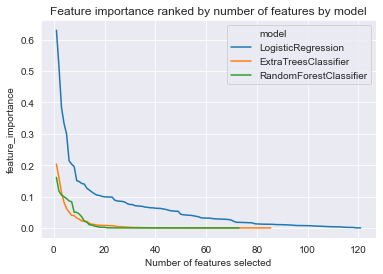

In [17]:
plt.title('Feature importance ranked by number of features by model')
sns.lineplot(data=importance_features_sorted_all, x='ranking', y='feature_importance', hue='model')
plt.xlabel("Number of features selected")

In [18]:
#selecting final estimator
selected_model = 'LogisticRegression'
number_of_features = 60
select_features_by_model = importance_features_sorted_all[importance_features_sorted_all['model'] == selected_model].index[:number_of_features].tolist()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

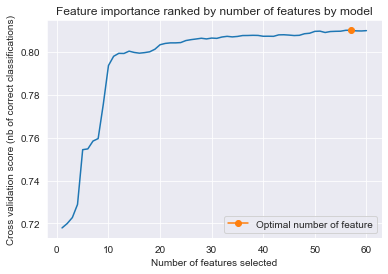

Wall time: 25min 57s


In [19]:
%%time
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator=model_dict['LogisticRegression'].set_params(max_iter=150, C=1), step=1, cv=StratifiedKFold(10), scoring='accuracy', n_jobs=-1)
rfecv.fit(x_train[select_features_by_model], y_train)

plt.figure()
plt.title('Feature importance ranked by number of features by model')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.plot(rfecv.n_features_, rfecv.grid_scores_[rfecv.n_features_-1], marker='o', label='Optimal number of feature')
plt.legend(loc='best')
plt.show()

In [20]:
rfecv_df = pd.DataFrame({'feature': select_features_by_model})
rfecv_df['rank'] = np.nan
for index, support in enumerate(rfecv.get_support(indices=True)):
    rfecv_df.loc[support, 'rank'] = index
for index, rank in enumerate(rfecv.ranking_ -2):
    if rank >= 0:
        rfecv_df.loc[index, 'rank'] = rfecv.n_features_ + rank

In [21]:
rfecv_df

,feature,rank
0,Medical_History_23,0.0
1,Medical_History_4,1.0
2,Medical_Keyword_15,2.0
3,BMI,3.0
4,InsuredInfo_6,4.0
5,Wt,5.0
6,Medical_History_39,6.0
7,Product_Info_4,7.0
8,Medical_History_16,57.0
9,Medical_Keyword_3,8.0


In [22]:
rfecv_df.to_csv("final_features.csv")

### Model Training

In [14]:
rfecv_df =pd.read_csv("final_features.csv")

In [15]:
#keep only the required features
features_to_keep=rfecv_df[rfecv_df['rank']<55]["feature"].to_list()

In [24]:
features_to_keep

['Medical_History_23',
 'Medical_History_4',
 'Medical_Keyword_15',
 'BMI',
 'InsuredInfo_6',
 'Wt',
 'Medical_History_39',
 'Product_Info_4',
 'Medical_Keyword_3',
 'InsuredInfo_7',
 'Medical_History_30',
 'Employment_Info_3',
 'Medical_History_33',
 'Insurance_History_2',
 'Medical_Keyword_23',
 'Medical_History_26',
 'Medical_History_6',
 'Product_Info_6',
 'InsuredInfo_5',
 'InsuredInfo_2',
 'Medical_Keyword_48',
 'Family_Hist_1',
 'InsuredInfo_1',
 'Ins_Age',
 'Medical_History_11',
 'Medical_History_8',
 'Medical_History_13',
 'Insurance_History_9',
 'Employment_Info_6',
 'Employment_Info_5',
 'Product_Info_5',
 'Insurance_History_3',
 'Medical_History_31',
 'Product_Info_2',
 'Medical_History_7',
 'Medical_Keyword_25',
 'Medical_History_28',
 'Medical_History_27',
 'Product_Info_1',
 'Medical_History_14',
 'Medical_History_18',
 'Ht',
 'Medical_History_17',
 'Medical_History_5',
 'Medical_History_36',
 'Medical_History_22',
 'Insurance_History_7',
 'Medical_History_38',
 'Medical

In [16]:
#train set 
x_train = x_train[features_to_keep]
#validation set
x_validate = x_validate[features_to_keep]
#test set
X_test = X_test[features_to_keep]

#### SMOTE for training set to balance classes

In [17]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {x_train.shape}
Shape of X after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print(y_train.value_counts(normalize=True) * 100)

print('\nBalance of positive and negative classes after SMOTE (%):')
print(y_sm.value_counts(normalize=True) * 100)

Shape of X before SMOTE: (38003, 55)
Shape of X after SMOTE: (51032, 55)

Balance of positive and negative classes (%):
1    67.142068
0    32.857932
Name: labels, dtype: float64

Balance of positive and negative classes after SMOTE (%):
1    50.0
0    50.0
Name: labels, dtype: float64


###  AdaBoost model

In [126]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200)
classifier.fit(x_sm, y_sm)

print(classification_report(y_validate, classifier.predict(x_validate),digits=4))

              precision    recall  f1-score   support

           0     0.7134    0.7578    0.7349      3150
           1     0.8760    0.8490    0.8623      6351

    accuracy                         0.8188      9501
   macro avg     0.7947    0.8034    0.7986      9501
weighted avg     0.8221    0.8188    0.8201      9501



#### Optimisation

In [34]:
param_grid ={
    "n_estimators": [125,175,225,300],
    "learning_rate": [0.001, 0.01, 0.1,0.3]
}
grid = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
    n_estimators=200),param_grid=param_grid)
grid_result=grid.fit(x_sm, y_sm)

In [128]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.855936 using {'learning_rate': 0.3, 'n_estimators': 225}


###  XGBoost model

In [59]:
model = XGBClassifier()
model.fit(x_sm, y_sm)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
print(classification_report(y_validate, model.predict(x_validate),digits=4))

              precision    recall  f1-score   support

           0     0.7089    0.7746    0.7403      3150
           1     0.8828    0.8422    0.8620      6351

    accuracy                         0.8198      9501
   macro avg     0.7959    0.8084    0.8012      9501
weighted avg     0.8252    0.8198    0.8217      9501



#### Optimisation

In [70]:
model = XGBClassifier()
max_depth= range(4,8)
learning_rate = [0.05,0.1, 0.3,0.5]
colsample_bytree = [0.2,0.3,0.4]
reg_alpha = [0, 0.001, 0.005, 0.01, 0.05]
reg_lambda = [0.1,1,5,10]
param_grid = dict(max_depth=max_depth,learning_rate=learning_rate,colsample_bytree=colsample_bytree,reg_alpha=reg_alpha,reg_lambda=reg_lambda)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(x_sm, y_sm)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.846039 using {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 7, 'reg_alpha': 0.001, 'reg_lambda': 0.1}


###  Random Forest model

In [56]:
model = RandomForestClassifier(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
model.fit(x_sm, y_sm)
preds = model.predict(x_validate)

print("Accuracy:",metrics.accuracy_score(y_validate, preds))

Accuracy: 0.8170718871697716


In [53]:
model = RandomForestClassifier(criterion="gini")
model.fit(x_sm, y_sm)

RandomForestClassifier()

In [54]:
print(classification_report(y_validate, model.predict(x_validate),digits=4))

              precision    recall  f1-score   support

           0     0.6907    0.8010    0.7417      3150
           1     0.8928    0.8221    0.8560      6351

    accuracy                         0.8151      9501
   macro avg     0.7917    0.8115    0.7989      9501
weighted avg     0.8258    0.8151    0.8181      9501



#### Optimisation

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 137, 225, 312, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 11, 17, 23, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 137, 225, 312,
                                                         400]},
                   random_state=42, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}